Fit planet HR8799 b, c, d and e


  0%|          | 0/10 [00:00<?, ?it/s]/home/sonic/anaconda3/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 10/10 [00:00<00:00, 40.43it/s]


Process took 0.3 seconds using 10 steps and 150 nwalkers
Number of 'burn-ins': 1


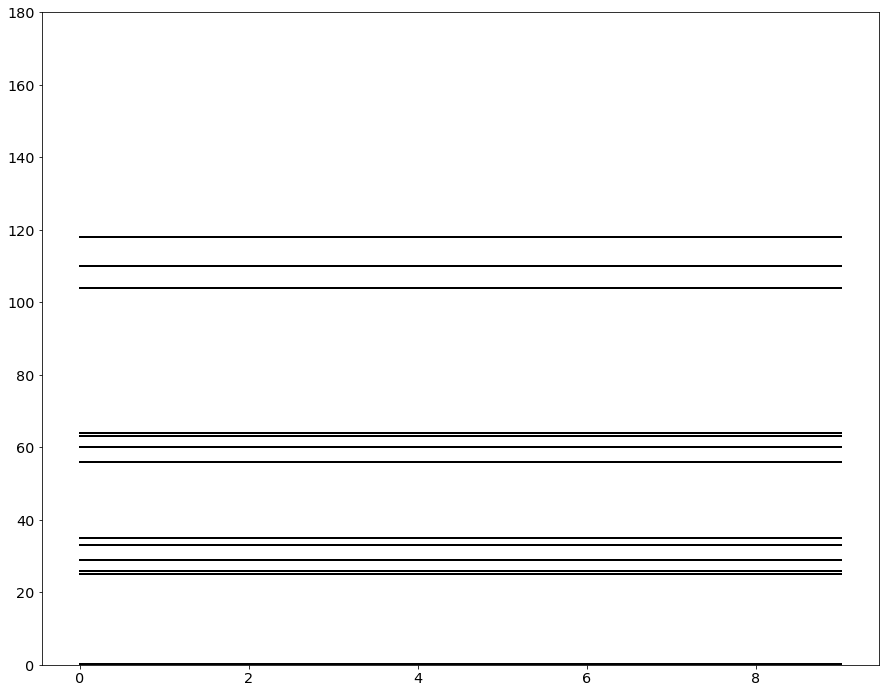

SystemExit: 

/home/sonic/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


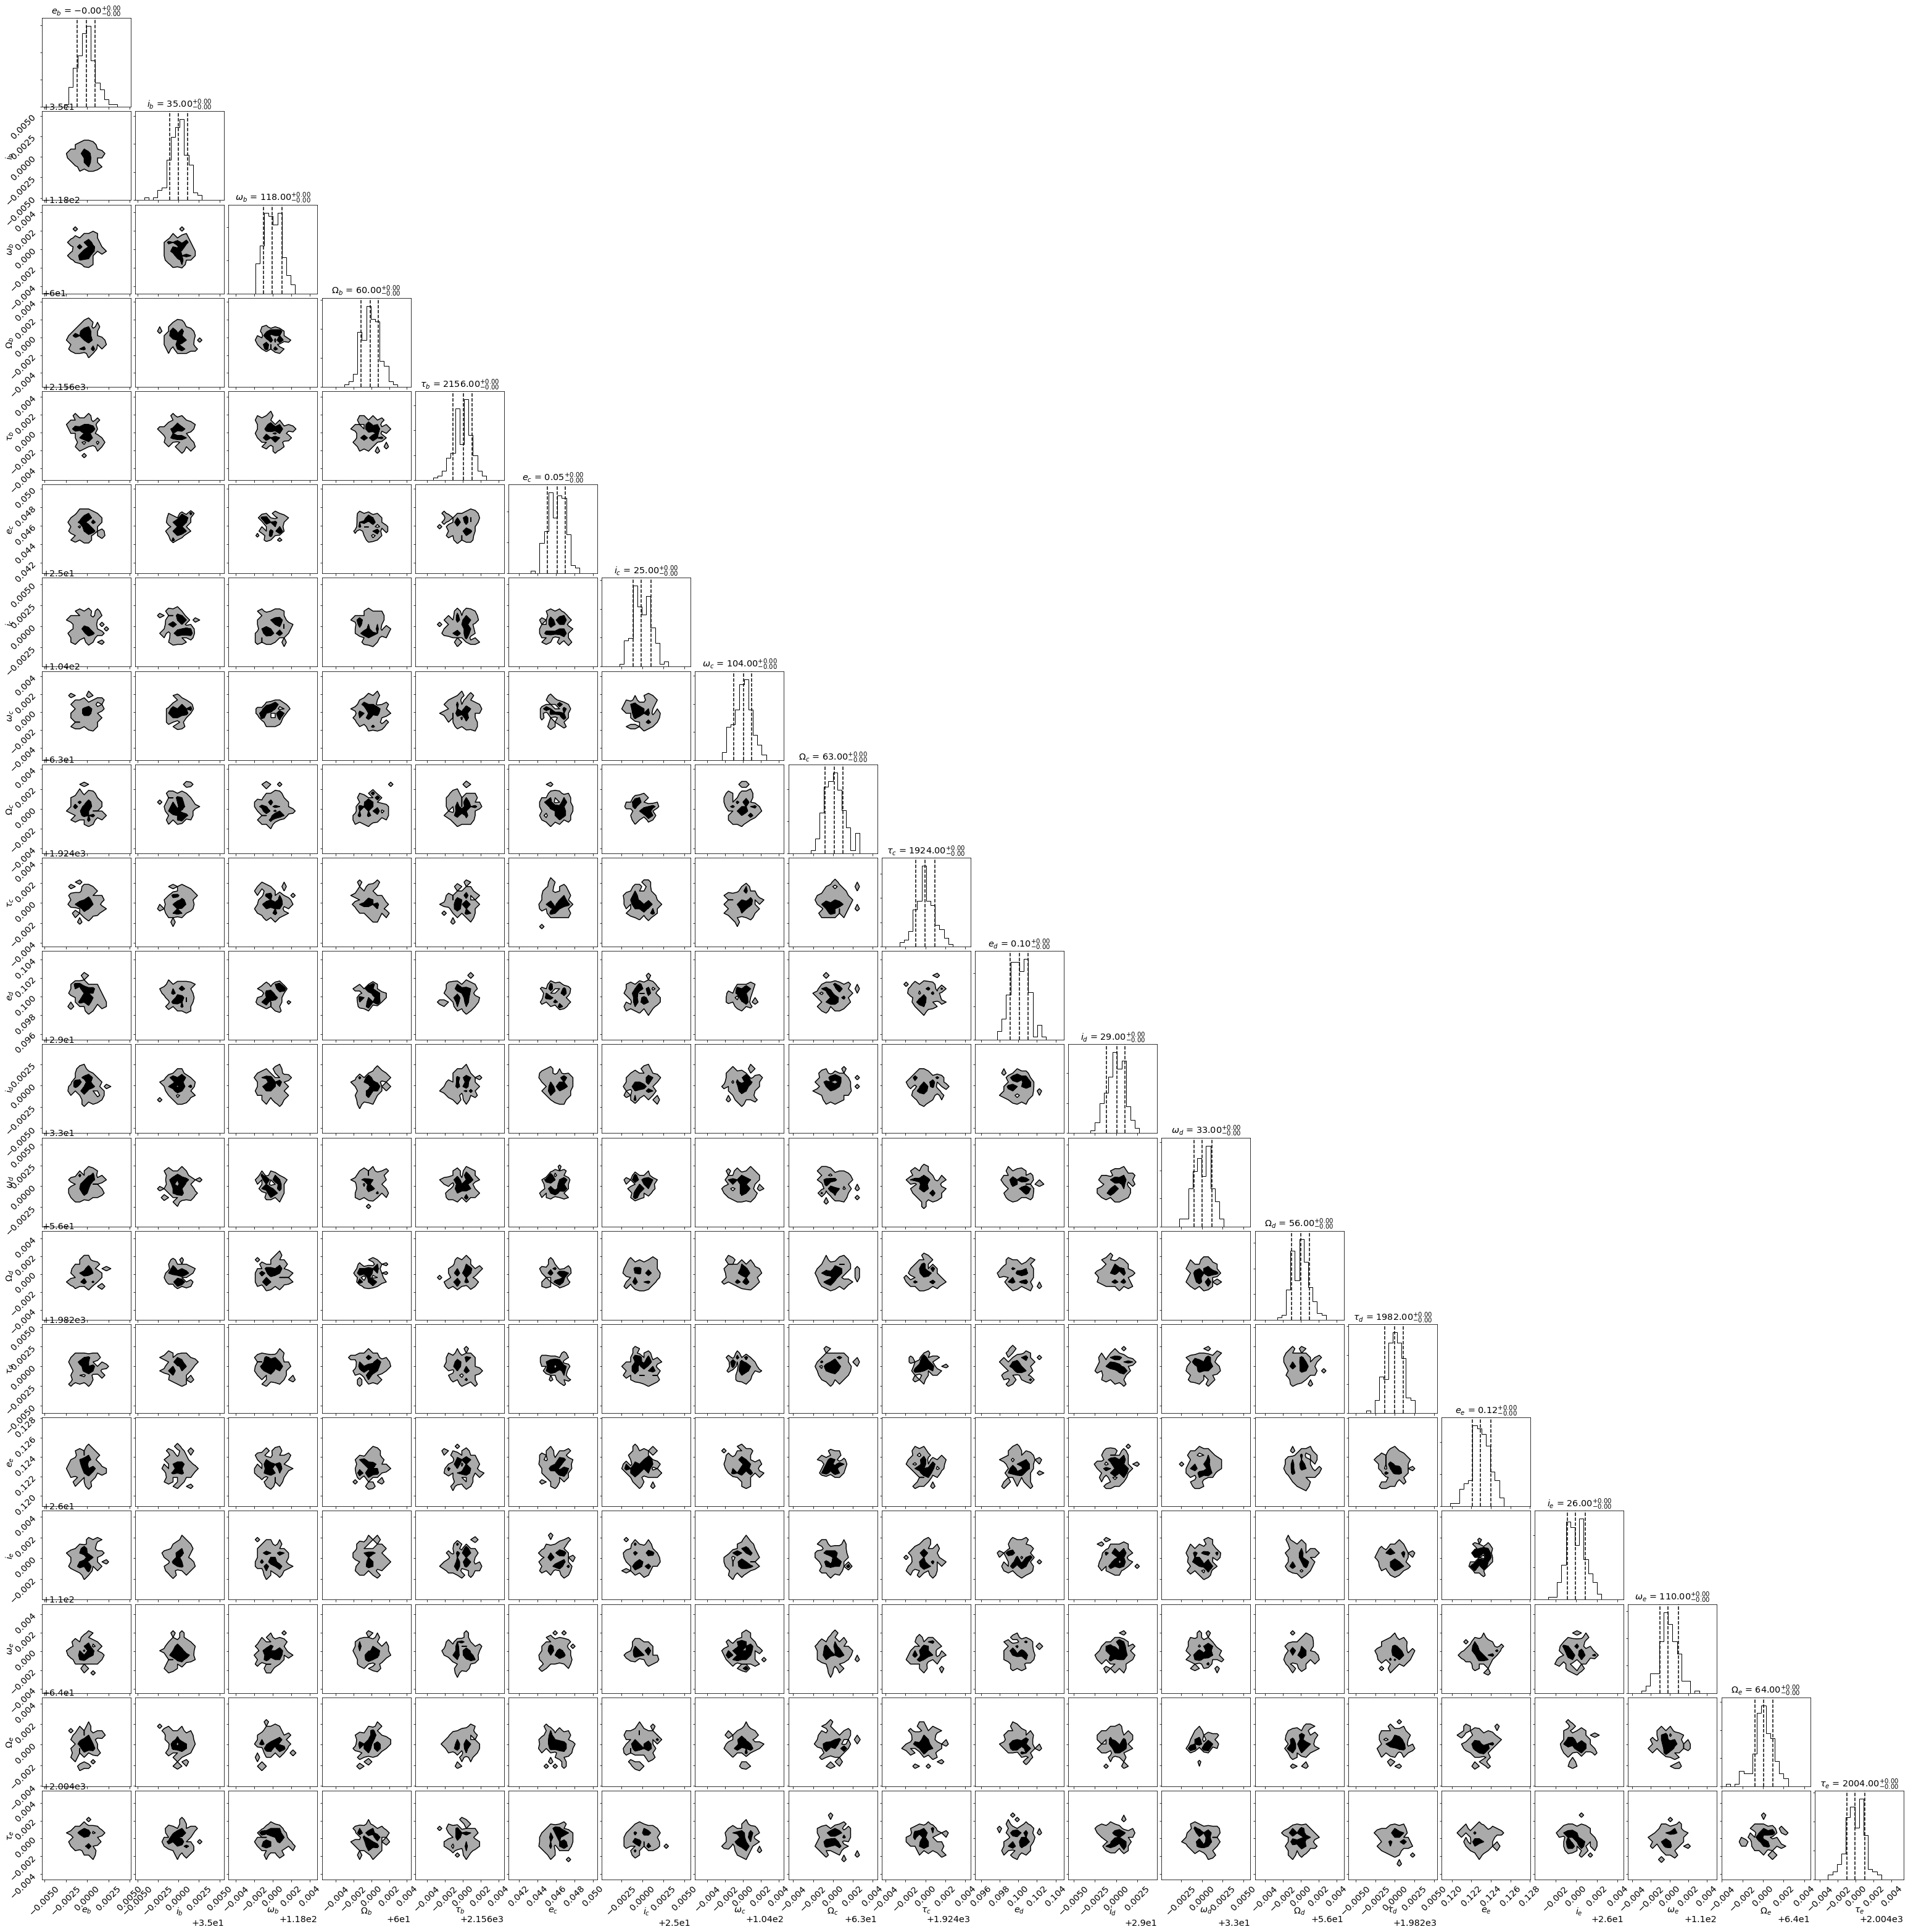

In [1]:
#!/usr/bin/python
# -*- coding: latin-1 -*-
import emcee
import os
#from cdecimal import Decimal
import decimal
import pandas as pd
from astropy.io import ascii
import sys
import math
import numpy as np
import corner
#import triangle
import matplotlib
import matplotlib.pyplot as plt
#get_ipython().magic('matplotlib')           # osx')
plt.rcParams['font.size']=10
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy.units as u
from astropy import wcs
from astropy.io import fits
import astropy.coordinates as coord
from matplotlib.legend_handler import HandlerLine2D
import time
from pylab import *
#from astrom_ali import thieleinnes
import thieleinnes
#from astrom_ali import quantiles
import quantiles
import matplotlib.patches as patches
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
print('Fit planet HR8799 b, c, d and e')

import numpy as np
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

pi_g = np.arccos(-1)
dist_p = 39.4
m_star = 1.52 #before was 1.51 - now it is 1.52, according to wang+ 2018 and baines+ 2012

pl_b = dict({"a_guess": 69.4,"e_guess":0.,"i_guess":35,"p_guess":456,
             "omega_guess":118,"Om_guess":60,"t_peri_guess":1700.+456.})

pl_c = dict({"a_guess": 69.4/(2**(2/3)),"e_guess":0.046,"i_guess":25,"p_guess":228,
             "omega_guess":104.,"Om_guess":63.,"t_peri_guess":1924.})

pl_d = dict({"a_guess": 69.4/(4**(2/3)),"e_guess":0.1,"i_guess":29,"p_guess":114,
             "omega_guess":+33.,"Om_guess":56,"t_peri_guess":1982.})

pl_e = dict({"a_guess": 69.4/(8**(2/3)),"e_guess":0.123,"i_guess":26,"p_guess":57,
             "omega_guess":110.,"Om_guess":64.,"t_peri_guess":2004.})

# pl_b = dict({"a_guess": 68.,"e_guess":0.,"i_guess":23,"p_guess":455,
#              "omega_guess":118,"Om_guess":60,"t_peri_guess":1700.+455.})

# pl_c = dict({"a_guess": 39.5,"e_guess":0.046,"i_guess":23,"p_guess":228,
#              "omega_guess":104.,"Om_guess":63.,"t_peri_guess":1924.})

# pl_d = dict({"a_guess": 25,"e_guess":0.1,"i_guess":23,"p_guess":114,
#              "omega_guess":+33.,"Om_guess":56,"t_peri_guess":1982.})

# pl_e = dict({"a_guess": 15.5,"e_guess":0.123,"i_guess":23,"p_guess":57,
#              "omega_guess":110.,"Om_guess":64.,"t_peri_guess":2004.})
t_peri_guess = [pl_b['t_peri_guess'],pl_c['t_peri_guess'],pl_d['t_peri_guess'],pl_e['t_peri_guess']]

planets={"b":pl_b,"c":pl_c,"d":pl_d,"e":pl_e}

pi_g = np.arccos(-1)

cols=('epoch','xb','xerrb','yb','yerrb','xc','xerrc','yc','yerrc','xd','xerrd',
      'yd','yerrd','xe','xerre','ye','yerre')
teste = pd.read_csv('astro_hr8799_irdis_new.txt',header=None,names=cols,sep='\t')

x_tmp = np.array([teste['xb'],teste['xc'],teste['xd'],teste['xe']])
y_tmp = np.array([teste['yb'],teste['yc'],teste['yd'],teste['ye']])
errx_tmp = np.array([teste['xerrb'],teste['xerrc'],teste['xerrd'],teste['xerre']])
erry_tmp = np.array([teste['yerrb'],teste['yerrc'],teste['yerrd'],teste['yerre']])
t_tmp = np.array(teste['epoch'])

data_0,data_1,data_2,data_3 = np.array([x_tmp[0],y_tmp[0]]),np.array([x_tmp[1],y_tmp[1]]),np.array([x_tmp[2],y_tmp[2]]),np.array([x_tmp[3],y_tmp[3]])
data_0[0],data_0[1] = -dist_p*data_0[0],dist_p*data_0[1]
data_1[0],data_1[1] = -dist_p*data_1[0],dist_p*data_1[1]
data_2[0],data_2[1] = -dist_p*data_2[0],dist_p*data_2[1]
data_3[0],data_3[1] = -dist_p*data_3[0],dist_p*data_3[1]

err_data_0,err_data_1,err_data_2,err_data_3 = np.array([errx_tmp[0],erry_tmp[0]]),np.array([errx_tmp[1],erry_tmp[1]]),np.array([errx_tmp[2],erry_tmp[2]]),np.array([errx_tmp[3],erry_tmp[3]])
err_data_0[0],err_data_0[1] = dist_p*err_data_0[0],dist_p*err_data_0[1]
err_data_1[0],err_data_1[1] = dist_p*err_data_1[0],dist_p*err_data_1[1]
err_data_2[0],err_data_2[1] = dist_p*err_data_2[0],dist_p*err_data_2[1]
err_data_3[0],err_data_3[1] = dist_p*err_data_3[0],dist_p*err_data_3[1]

# diff = err_data[0][0]-err_data[0][1]
# plt.hist(err_data[0][0]-err_data[0][1],bins=100)
# print(np.mean(diff),np.std(diff))
# len(np.where((diff==0))[0])/len(diff)
# diff2 = diff[np.where((diff!=0))[0]]
# plt.hist(diff2)
# plt.hist(np.sqrt(2)*err_data[0][0] - np.sqrt(err_data[0][0]**2 + err_data[0][1]**2))

t = t_tmp
data = np.array([data_0,data_1,data_2,data_3])
err_data = np.array([err_data_0,err_data_1,err_data_2,err_data_3])
t_fine = arange(91200)/200. + t[0] - 20.

datax_b_plot = data[0][0][np.where((x_tmp[0] != 0) & (y_tmp[0] != 0))]
errdatax_b_plot = err_data[0][0][np.where((x_tmp[0] != 0) & (y_tmp[0] != 0))]
datay_b_plot = data[0][1][np.where((x_tmp[0] != 0) & (y_tmp[0] != 0))]
errdatay_b_plot = err_data[0][1][np.where((x_tmp[0] != 0) & (y_tmp[0] != 0))]
t_b_plot = t[np.where((x_tmp[0] != 0) & (y_tmp[0] != 0))]
t_b_plot = arange(91200)/200. + t_b_plot[0] - 20.

datax_c_plot = data[1][0][np.where((x_tmp[1] != 0) & (y_tmp[1] != 0))]
errdatax_c_plot = err_data[1][0][np.where((x_tmp[1] != 0) & (y_tmp[1] != 0))]
datay_c_plot = data[1][1][np.where((x_tmp[1] != 0) & (y_tmp[1] != 0))]
errdatay_c_plot = err_data[1][1][np.where((x_tmp[1] != 0) & (y_tmp[1] != 0))]
t_c_plot = t[np.where((x_tmp[1] != 0) & (y_tmp[1] != 0))]
t_c_plot = arange(91200)/200. + t_c_plot[0] - 20.

datax_d_plot = data[2][0][np.where((x_tmp[2] != 0) & (y_tmp[2] != 0))]
errdatax_d_plot = err_data[2][0][np.where((x_tmp[2] != 0) & (y_tmp[2] != 0))]
datay_d_plot = data[2][1][np.where((x_tmp[2] != 0) & (y_tmp[2] != 0))]
errdatay_d_plot = err_data[2][1][np.where((x_tmp[2] != 0) & (y_tmp[2] != 0))]
t_d_plot = t[np.where((x_tmp[2] != 0) & (y_tmp[2] != 0))]
t_d_plot = arange(91200)/200. + t_d_plot[0] - 20.

datax_e_plot = data[3][0][np.where((x_tmp[3] != 0) & (y_tmp[3] != 0))]
errdatax_e_plot = err_data[3][0][np.where((x_tmp[3] != 0) & (y_tmp[3] != 0))]
datay_e_plot = data[3][1][np.where((x_tmp[3] != 0) & (y_tmp[3] != 0))]
errdatay_e_plot = err_data[3][1][np.where((x_tmp[3] != 0) & (y_tmp[3] != 0))]
t_e_plot = t[np.where((x_tmp[3] != 0) & (y_tmp[3] != 0))]
t_e_plot = arange(91200)/200. + t_e_plot[0] - 20.

########################################################################################
coord_guess_b = thieleinnes.thieleinnes(planets['b']['a_guess'],planets['b']['e_guess'],
                                      planets['b']['i_guess'],m_star,planets['b']['omega_guess'],
                                      planets['b']['Om_guess'],planets['b']['t_peri_guess'],t)
coord_guess_c = thieleinnes.thieleinnes(planets['c']['a_guess'],planets['c']['e_guess'],
                                      planets['c']['i_guess'],m_star,planets['c']['omega_guess'],
                                      planets['c']['Om_guess'],planets['c']['t_peri_guess'],t)
coord_guess_d = thieleinnes.thieleinnes(planets['d']['a_guess'],planets['d']['e_guess'],
                                      planets['d']['i_guess'],m_star,planets['d']['omega_guess'],
                                      planets['d']['Om_guess'],planets['d']['t_peri_guess'],t)
coord_guess_e = thieleinnes.thieleinnes(planets['e']['a_guess'],planets['e']['e_guess'],
                                      planets['e']['i_guess'],m_star,planets['e']['omega_guess'],
                                      planets['e']['Om_guess'],planets['e']['t_peri_guess'],t)

coord_guess_b_fine = thieleinnes.thieleinnes(planets['b']['a_guess'],planets['b']['e_guess'],
                                      planets['b']['i_guess'],m_star,planets['b']['omega_guess'],
                                      planets['b']['Om_guess'],planets['b']['t_peri_guess'],t_fine)
coord_guess_c_fine = thieleinnes.thieleinnes(planets['c']['a_guess'],planets['c']['e_guess'],
                                      planets['c']['i_guess'],m_star,planets['c']['omega_guess'],
                                      planets['c']['Om_guess'],planets['c']['t_peri_guess'],t_fine/2)
coord_guess_d_fine = thieleinnes.thieleinnes(planets['d']['a_guess'],planets['d']['e_guess'],
                                      planets['d']['i_guess'],m_star,planets['d']['omega_guess'],
                                      planets['d']['Om_guess'],planets['d']['t_peri_guess'],t_fine/5)
coord_guess_e_fine = thieleinnes.thieleinnes(planets['e']['a_guess'],planets['e']['e_guess'],
                                      planets['e']['i_guess'],m_star,planets['e']['omega_guess'],
                                      planets['e']['Om_guess'],planets['e']['t_peri_guess'],t_fine/9.2)
coord_guess = np.array([coord_guess_b,coord_guess_c,coord_guess_d,coord_guess_e])
coord_guess_fine = [coord_guess_b_fine,coord_guess_c_fine,coord_guess_d_fine,coord_guess_e_fine]
# ############################################################
# figure1 = plt.figure()
# plt.figure(figsize=(15,10))

# plt.errorbar(datax_b_plot,datay_b_plot,errdatax_b_plot,errdatay_b_plot,'bo',
#              label='HR 8799 b')
# plt.errorbar(datax_c_plot,datay_c_plot,errdatax_c_plot,errdatay_c_plot,'go',
#              label='HR 8799 c')
# plt.errorbar(datax_d_plot,datay_d_plot,errdatax_d_plot,errdatay_d_plot,'yo',
#              label='HR 8799 d')
# plt.errorbar(datax_e_plot,datay_e_plot,errdatax_e_plot,errdatay_e_plot,'o',color='gray',
#              label='HR 8799 e')
# plt.plot([0],[0],'r*',markersize=20) #star red

# plt.plot(coord_guess_fine[0][0],coord_guess_fine[0][1],'black',linestyle=':')
# plt.plot(coord_guess_fine[1][0],coord_guess_fine[1][1],'black',linestyle=':')
# plt.plot(coord_guess_fine[2][0],coord_guess_fine[2][1],'black',linestyle=':')
# plt.plot(coord_guess_fine[3][0],coord_guess_fine[3][1],'black',linestyle=':')

# style="Simple,tail_width=0.7,head_width=8,head_length=8"
# kw = dict(arrowstyle=style, color="r")

# b = patches.FancyArrowPatch((datax_b_plot[-1],datay_b_plot[-1]), (coord_guess_fine[0][0][12000],coord_guess_fine[0][1][12000]),connectionstyle="arc3,rad=.15", **kw)
# c = patches.FancyArrowPatch((datax_c_plot[-1],datay_c_plot[-1]), (coord_guess_fine[1][0][10500],coord_guess_fine[1][1][10500]),connectionstyle="arc3,rad=.11", **kw)
# d = patches.FancyArrowPatch((datax_d_plot[-1],datay_d_plot[-1]), (coord_guess_fine[2][0][8000],coord_guess_fine[2][1][8000]),connectionstyle="arc3,rad=.28", **kw)
# e = patches.FancyArrowPatch((datax_e_plot[-1],datay_e_plot[-1]), (coord_guess_fine[3][0][45000],coord_guess_fine[3][1][45000]),connectionstyle="arc3,rad=.28", **kw)
# for a in [b,c,d,e]:
#     plt.gca().add_patch(a)

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.legend(prop={"size":18},loc='upper right')
# plt.savefig('lock_inc.png')

# labels = [str(t[i]) for i in range (data[0].shape[0])]
# labels = str(t[0]),str(t[-1])
############################################################################################
nwalkers = 150
ndim = 6*4
GG = 1.     #39.478/(4.*pi_g**2.)

guess_b = np.array([planets['b']['a_guess'],planets['b']['e_guess'],planets['b']['i_guess'],
                   planets['b']['omega_guess'],planets['b']['Om_guess'],planets['b']['t_peri_guess']])
guess_c = np.array([planets['c']['a_guess'],planets['c']['e_guess'],planets['c']['i_guess'],
                   planets['c']['omega_guess'],planets['c']['Om_guess'],planets['c']['t_peri_guess']])
guess_d = np.array([planets['d']['a_guess'],planets['d']['e_guess'],planets['d']['i_guess'],
                   planets['d']['omega_guess'],planets['d']['Om_guess'],planets['d']['t_peri_guess']])
guess_e = np.array([planets['e']['a_guess'],planets['e']['e_guess'],planets['e']['i_guess'],
                   planets['e']['omega_guess'],planets['e']['Om_guess'],planets['e']['t_peri_guess']])
guess = np.array([guess_b,guess_c,guess_d,guess_e])

a_guess = np.array([planets['b']['a_guess'],planets['c']['a_guess'],planets['d']['a_guess'],
                    planets['e']['a_guess']])
delta_a = a_guess/2

p_yr_guess = np.sqrt((a_guess**3.)/(m_star*GG))
delta_t_peri = p_yr_guess

p0 = np.zeros((nwalkers,ndim))
for i in range(nwalkers):
    p0[i,:] = np.random.normal(guess.flatten(),1e-3,ndim)
p02 = np.delete(p0,[0,6,12,18],axis=1) # will just lock the inclinations

coord = np.zeros((4,nwalkers,2,len(t)))
a,e,inc,omega,Om,t_peri = np.zeros((4)),np.zeros((4)),np.zeros((4)),np.zeros((4)),np.zeros((4)),np.zeros((4))

for i in range(4):
    for j in range(nwalkers):
        a[0],e[0],inc[0],omega[0],Om[0],t_peri[0] = p0[j][0:6]
        a[1],e[1],inc[1],omega[1],Om[1],t_peri[1] = p0[j][6*1:6*2]
        a[2],e[2],inc[2],omega[2],Om[2],t_peri[2] = p0[j][6*2:6*3]
        a[3],e[3],inc[3],omega[3],Om[3],t_peri[3] = p0[j][6*3:6*4]
        coord[0,j] = thieleinnes.thieleinnes(a[0], e[0], inc[0], m_star, omega[0], Om[0],
                                             t_peri_guess[0],t)
        coord[1,j] = thieleinnes.thieleinnes(a[1], e[1], inc[1], m_star, omega[1], Om[1],
                                             t_peri_guess[1],t)
        coord[2,j] = thieleinnes.thieleinnes(a[2], e[2], inc[2], m_star, omega[2], Om[2],
                                             t_peri_guess[2],t)
        coord[3,j] = thieleinnes.thieleinnes(a[3], e[3], inc[3], m_star, omega[3], Om[3],
                                             t_peri_guess[3],t)
####################################################################################
# STARTING FROM HERE I DO NOT USE THE INCLINATION
def lnprior2(theta):
    e,i,omega,Om,t_peri=[],[],[],[],[]
    for k in range(ndim-4):
        if k==0 or k%5==0:
            e.append(theta[k])
        elif k==1 or (k-1)%5==0:
            i.append(theta[k])
        elif k==2 or (k-2)%5==0:
            omega.append(theta[k])
        elif k==3 or (k-3)%5==0:
            Om.append(theta[k])
        elif k==4 or (k-4)%5==0:
            t_peri.append(theta[k])
    r=0
    # rHill for 6Mj (max mass found in stable orbits - Wang) 
    for j in range(4):
#         rHill = a[j]*(1-e[j])* ((9.5e-4)/(3*m_star))**(1/3)
        if 0.<= e[j]<1. and 0<= i[j] <=90. and -180.<= omega[j]<=180. and -180.<=Om[j]<=180.:
            r=r+1
    if r==4:
        return 0.0
    else:
        return -np.inf

def lnprob2(theta,data):
    lp = lnprior2(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike2(theta,data)

def lnlike2(theta,data):
    res_norm = []
    ndatax = len(data[0][0])
    ey = []
    for i in range(4):
        datax = data[i][0]        
        datay = data[i][1]
        err_datax = err_data[i][0]
        err_datay = err_data[i][1]
        for j in range(nwalkers):
            coordx = coord[i][j][0]
            coordy = coord[i][j][1]
            for k in range(ndatax):
                if datax[k] != 0 and datay[k] != 0:
                    iey = np.sqrt(err_datax[k]**2 +err_datay[k]**2)
#                     iey = (np.sqrt(2.)*err_datax[k])
                    ey.append(iey)
                    res_norm.append((np.sqrt((datax[k]-coordx[k])**2. + (datay[k]-coordy[k])**2.))/iey)
    ey =np.array(ey)
    res_norm = np.array(res_norm)
    loglike = -0.5*(res_norm**2 + np.log(2.0*pi_g*ey**2))
    return np.sum(loglike)

os.environ["OMP_NUM_THREADS"] = "1"
# Here the mean running time is 1 Gyr
################################################################
import time
runs = 10000
ndim2 = ndim-4
from multiprocessing import Pool
with Pool() as pool:
    start = time.time()
    sampler = emcee.EnsembleSampler(nwalkers,ndim2,lnprob2,pool=pool,args=(data,))#, threads=20)
    sampler.run_mcmc(p02,runs,progress=True)
    end = time.time()
    total_time = end-start
    print("Process took {0:.1f} seconds".format(total_time),"using",runs,"steps and",nwalkers,
         "nwalkers")
###########################################################################

np.save('orbit_samplerHR8799_resonance_'+str(runs)+'.npy', sampler.chain)
np.save('orbit_lnprobHR8799_resonance_'+str(runs)+'.npy', sampler.lnprobability)
# N = 100
N = 1000
print("Number of 'burn-ins':",N)
aux = sampler.chain[:,N:,:].reshape((-1,ndim2)) #removing burn-ins

chainz = plt.figure(figsize = (15, 12))
for i in range(ndim2):
    plt.ylim(0,180)
    plt.plot(sampler.chain[:,:,i].T, '-', color='k', alpha=0.3)
chainz.savefig('orbit_chainzHR8799'+'planets_resonance_'+str(runs)+'.pdf')
plt.show(block=False)

q = [0.16, 0.5, 0.84] # quantiles=[0.16, 0.5, 0.84]
x_m = np.zeros(ndim2)
x_s = np.zeros(ndim2)
x_d = np.zeros(ndim2)

for i in range(ndim2):
    x = aux[:,i]
    values = quantiles.quantiles(x,q)
    x_m[i] = values[1]
    x_s[i] = values[0]
    x_d[i] = values[2]
    
e_res = np.array([x_m[0],x_m[5],x_m[10],x_m[15]])
i_res = np.array([x_m[1],x_m[6],x_m[11],x_m[16]])
omega_res = np.array([x_m[2],x_m[7],x_m[12],x_m[17]])
Om_res = np.array([x_m[3],x_m[8],x_m[13],x_m[18]])
tp_res = np.array([x_m[4],x_m[9],x_m[14],x_m[19]])

e_sx = np.array([x_s[0],x_s[5],x_s[10],x_s[15]])-e_res
i_sx = np.array([x_s[1],x_s[6],x_s[11],x_s[16]])-i_res
omega_sx = np.array([x_s[2],x_s[7],x_s[12],x_s[17]])-omega_res
Om_sx = np.array([x_s[3],x_s[8],x_s[13],x_s[18]])-Om_res
tp_sx = np.array([x_s[4],x_s[9],x_s[14],x_s[19]])-tp_res

e_dx = np.array([x_d[0],x_d[5],x_d[10],x_d[15]])-e_res
i_dx = np.array([x_d[1],x_d[6],x_d[11],x_d[16]])-i_res
omega_dx = np.array([x_d[2],x_d[7],x_d[12],x_d[17]])-omega_res
Om_dx = np.array([x_d[3],x_d[8],x_d[13],x_d[18]])-Om_res
tp_dx = np.array([x_d[4],x_d[9],x_d[14],x_d[19]])-tp_res

nsigma = 5.
labels = [r'$e_b$',r'$i_b$',r'$\omega_b$',r'$\Omega_b$',r'$\tau_b$',
          r'$e_c$',r'$i_c$',r'$\omega_c$',r'$\Omega_c$',r'$\tau_c$',
          r'$e_d$',r'$i_d$',r'$\omega_d$',r'$\Omega_d$',r'$\tau_d$',
          r'$e_e$',r'$i_e$',r'$\omega_e$',r'$\Omega_e$',r'$\tau_e$']
post_distr_fun = corner.corner(aux, quantiles=(0.1587, 0.5, 0.8413), levels=(1-np.exp(-0.5), 1-np.exp(-2)), show_titles=True,
                               title_fmt=".2f", title_args={"fontsize": 12},
                               range=[(e_res[0]+e_sx[0]*nsigma, e_res[0]+e_dx[0]*nsigma),
        (i_res[0]+i_sx[0]*nsigma, i_res[0]+i_dx[0]*nsigma),
        (omega_res[0]+omega_sx[0]*nsigma, omega_res[0]+omega_dx[0]*nsigma),
        (Om_res[0]+Om_sx[0]*nsigma, Om_res[0]+Om_dx[0]*nsigma),
        (tp_res[0]+tp_sx[0]*nsigma, tp_res[0]+tp_dx[0]*nsigma),
        (e_res[1]+e_sx[1]*nsigma, e_res[1]+e_dx[1]*nsigma),
        (i_res[1]+i_sx[1]*nsigma, i_res[1]+i_dx[1]*nsigma),
        (omega_res[1]+omega_sx[1]*nsigma, omega_res[1]+omega_dx[1]*nsigma),
        (Om_res[1]+Om_sx[1]*nsigma, Om_res[1]+Om_dx[1]*nsigma),
        (tp_res[1]+tp_sx[1]*nsigma, tp_res[1]+tp_dx[1]*nsigma),
        (e_res[2]+e_sx[2]*nsigma, e_res[2]+e_dx[2]*nsigma),
        (i_res[2]+i_sx[2]*nsigma, i_res[2]+i_dx[2]*nsigma),
        (omega_res[2]+omega_sx[2]*nsigma, omega_res[2]+omega_dx[2]*nsigma),
        (Om_res[2]+Om_sx[2]*nsigma, Om_res[2]+Om_dx[2]*nsigma),
        (tp_res[2]+tp_sx[2]*nsigma, tp_res[2]+tp_dx[2]*nsigma),
        (e_res[3]+e_sx[3]*nsigma, e_res[3]+e_dx[3]*nsigma),
        (i_res[3]+i_sx[3]*nsigma, i_res[3]+i_dx[3]*nsigma),
        (omega_res[3]+omega_sx[3]*nsigma, omega_res[3]+omega_dx[3]*nsigma),
        (Om_res[3]+Om_sx[3]*nsigma, Om_res[3]+Om_dx[3]*nsigma),
        (tp_res[3]+tp_sx[3]*nsigma, tp_res[3]+tp_dx[3]*nsigma)],
                               plot_datapoints=False, labels = labels,fill_contours=True)#, smooth=1.0, bins=20.)
post_distr_fun.savefig('orbit_post_HR8799_lock_resonance.pdf')
sys.exit()

In [ ]:
# ranger=[(a_res[0]+a_sx[0]*nsigma, a_res[0]+a_dx[0]*nsigma),
#         (e_res[0]+e_sx[0]*nsigma, e_res[0]+e_dx[0]*nsigma),
#         (i_res[0]+i_sx[0]*nsigma, i_res[0]+i_dx[0]*nsigma),
#         (omega_res[0]+omega_sx[0]*nsigma, omega_res[0]+omega_dx[0]*nsigma),
#         (Om_res[0]+Om_sx[0]*nsigma, Om_res[0]+Om_dx[0]*nsigma),
#         (a_res[1]+a_sx[1]*nsigma, a_res[1]+a_dx[1]*nsigma),
#         (e_res[1]+e_sx[1]*nsigma, e_res[1]+e_dx[1]*nsigma),
#         (i_res[1]+i_sx[1]*nsigma, i_res[1]+i_dx[1]*nsigma),
#         (omega_res[1]+omega_sx[1]*nsigma, omega_res[1]+omega_dx[1]*nsigma),
#         (Om_res[1]+Om_sx[1]*nsigma, Om_res[1]+Om_dx[1]*nsigma),
#         (a_res[2]+a_sx[2]*nsigma, a_res[2]+a_dx[2]*nsigma),
#         (e_res[2]+e_sx[2]*nsigma, e_res[2]+e_dx[2]*nsigma),
#         (i_res[2]+i_sx[2]*nsigma, i_res[2]+i_dx[2]*nsigma),
#         (omega_res[2]+omega_sx[2]*nsigma, omega_res[2]+omega_dx[2]*nsigma),
#         (Om_res[2]+Om_sx[2]*nsigma, Om_res[2]+Om_dx[2]*nsigma),
#         (a_res[3]+a_sx[3]*nsigma, a_res[3]+a_dx[3]*nsigma),
#         (e_res[3]+e_sx[3]*nsigma, e_res[3]+e_dx[3]*nsigma),
#         (i_res[3]+i_sx[3]*nsigma, i_res[3]+i_dx[3]*nsigma),
#         (omega_res[3]+omega_sx[3]*nsigma, omega_res[3]+omega_dx[3]*nsigma),
#         (Om_res[3]+Om_sx[3]*nsigma, Om_res[3]+Om_dx[3]*nsigma)]